# Ensemble Learning on Nonlinear Dataset

This notebook demonstrates how **ensemble methods outperform simple models** when data is **nonlinear and noisy**.

We use the `make_moons` dataset to visualize decision boundaries and compare Logistic Regression, Decision Tree, Random Forest, AdaBoost, Gradient Boosting, XGBoost, LightGBM, and CatBoost.


In [13]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.6 MB/s eta 0:00:00


In [14]:

# If needed, install missing libraries
# !pip install xgboost lightgbm catboost --quiet

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.inspection import DecisionBoundaryDisplay
import warnings
warnings.filterwarnings('ignore')

try:
    import xgboost as xgb
except Exception:
    xgb = None
try:
    import lightgbm as lgb
except Exception:
    lgb = None
try:
    from catboost import CatBoostClassifier
except Exception:
    CatBoostClassifier = None

print('xgboost available:', xgb is not None)
print('lightgbm available:', lgb is not None)
print('catboost available:', CatBoostClassifier is not None)


xgboost available: True
lightgbm available: True
catboost available: True


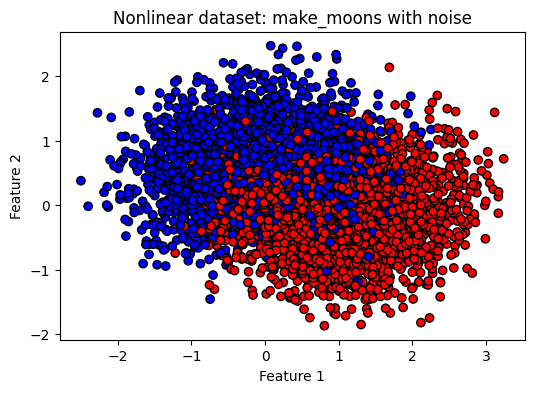

In [17]:

# Generate nonlinear dataset
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=5000, noise=0.5, random_state=42)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Visualize dataset
plt.figure(figsize=(6,4))
plt.scatter(X[:,0], X[:,1], c=y, cmap='bwr', edgecolors='k')
plt.title("Nonlinear dataset: make_moons with noise")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


In [18]:

# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(max_depth=3, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=500, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=500, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=500, random_state=42)
}

if xgb is not None:
    models["XGBoost"] = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
if lgb is not None:
    models["LightGBM"] = lgb.LGBMClassifier(random_state=42)
if CatBoostClassifier is not None:
    models["CatBoost"] = CatBoostClassifier(verbose=0, random_state=42)

# Train and evaluate
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    acc = model.score(X_test, y_test)
    results.append((name, acc))
    print(f"{name:20s} accuracy: {acc:.3f}")

results_df = pd.DataFrame(results, columns=["Model", "Accuracy"]).sort_values("Accuracy", ascending=False)
results_df


Logistic Regression  accuracy: 0.820
Decision Tree        accuracy: 0.837
Random Forest        accuracy: 0.809
AdaBoost             accuracy: 0.832
Gradient Boosting    accuracy: 0.817
XGBoost              accuracy: 0.822
[LightGBM] [Info] Number of positive: 1730, number of negative: 1770
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000130 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 3500, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.494286 -> initscore=-0.022858
[LightGBM] [Info] Start training from score -0.022858
LightGBM             accuracy: 0.828
CatBoost             accuracy: 0.831


,Model,Accuracy
1,Decision Tree,0.837333
3,AdaBoost,0.832000
7,CatBoost,0.831333
6,LightGBM,0.828000
5,XGBoost,0.822000
0,Logistic Regression,0.820000
4,Gradient Boosting,0.817333
2,Random Forest,0.808667


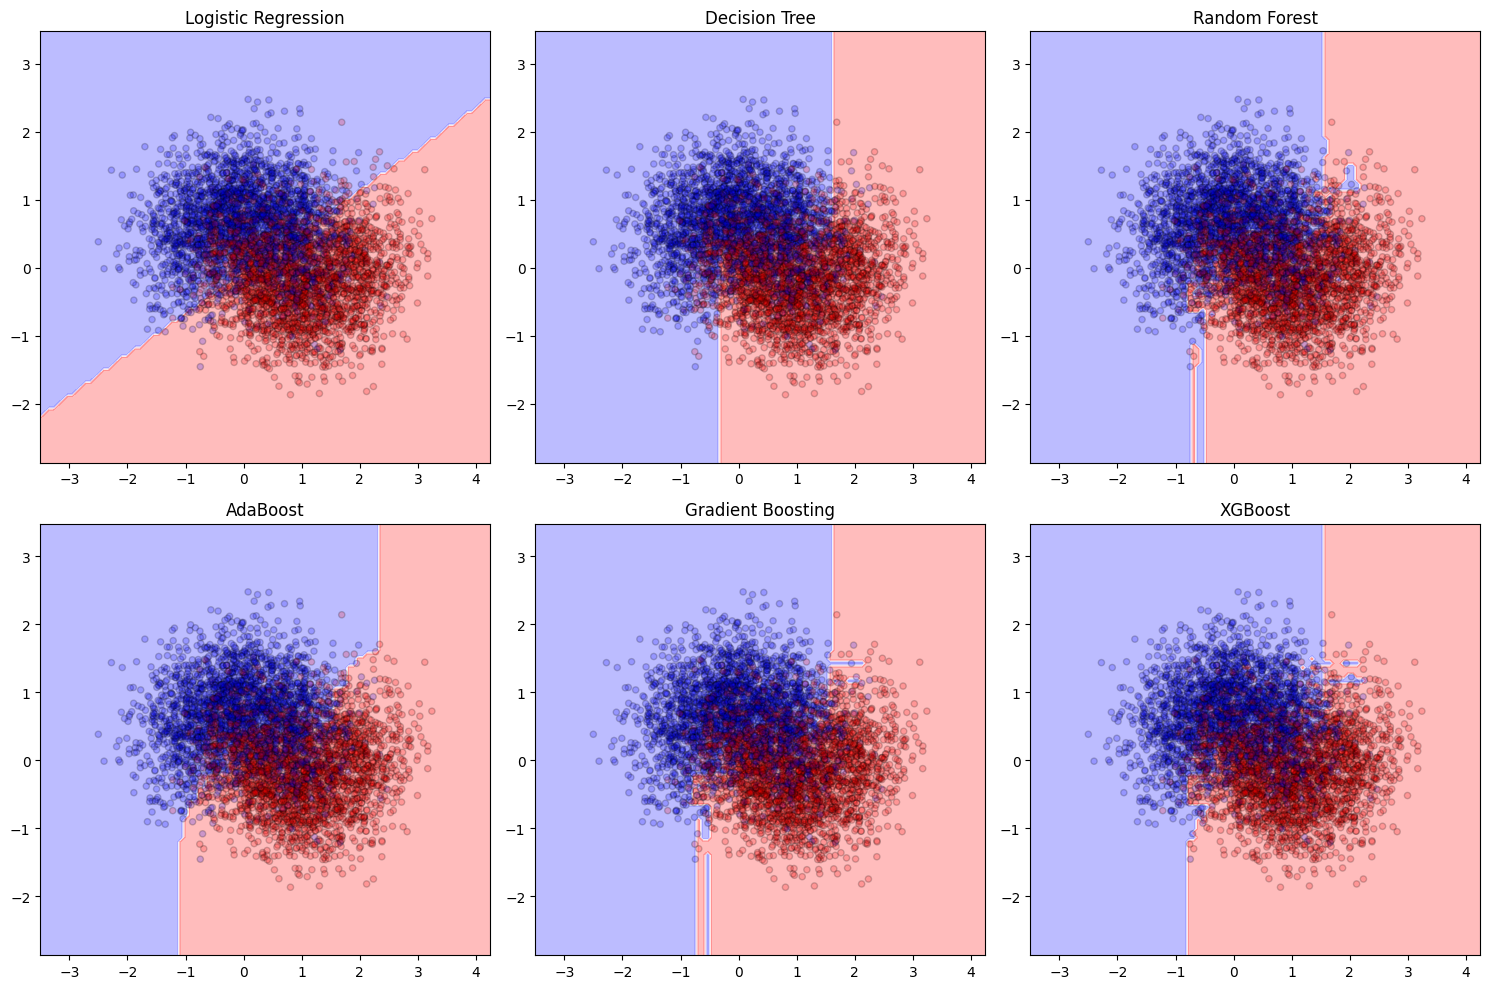

In [21]:

# Plot decision boundaries for visual comparison
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for idx, (name, model) in enumerate(models.items()):
    if idx >= len(axes): break
    display = DecisionBoundaryDisplay.from_estimator(
        model, X, response_method="predict", cmap="bwr", alpha=0.3, ax=axes[idx], grid_resolution=100)
    axes[idx].scatter(X[:,0], X[:,1], c=y, cmap="bwr", edgecolor="k", s=20, alpha=0.2)
    axes[idx].set_title(name)

plt.tight_layout()
plt.show()



## 🔍 Observations and Explanation

- **Logistic Regression:** Performs poorly — it draws a single straight line, which cannot separate the curved moon shapes.

- **Decision Tree:** Can model nonlinearity but tends to overfit and produce blocky boundaries.

- **Random Forest:** Combines many trees, giving smoother and more accurate boundaries.

- **AdaBoost / Gradient Boosting:** Sequentially improve weak learners, effectively capturing the moon shape with high accuracy.

- **XGBoost / LightGBM / CatBoost:** Highly optimized gradient boosting versions — often deliver the best accuracy and smooth boundaries.



✅ **Takeaway:** On nonlinear data, ensembles (especially boosting and forests) capture complex patterns that simple linear models cannot.

They reduce bias and increase predictive power — this is where ensemble learning truly shines!
